Hands-on exercises using Python, provided by [Course Statistics for Data Science with Python](https://www.coursera.org/learn/statistics-for-data-science-python/)

week 01 exercis: [click here](https://github.com/JeremiahZhang/gopython/blob/master/statistics-for-data-science-with-python/week01-descriptive-statistics.ipynb)

# Data Visualization

## Objectives

- Identifying duplicates
- Plotting scatterplots
- Plotting boxplots

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [3]:
ratings_df.head(3)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1


## Eexercises

> Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

`prof` : Indicating instructor identifier.

In [10]:
# Identify all duplicate cases using prof variable
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [11]:
ratings_df.prof.unique().shape

(94,)

In [12]:
ratings_df.prof.nunique()

94

In [13]:
#  Using all observations, find the average and standard deviation for age
ratings_df['age'].mean() # average

48.365010799136066

In [14]:
ratings_df['age'].std() # standard deviation

9.802742037864821

> Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

In [15]:
nonduplicates_ratings_df = ratings_df.drop_duplicates(subset=['prof'])
nonduplicates_ratings_df.head(3)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1


In [16]:
nonduplicates_ratings_df.shape

(94, 19)

In [17]:
nonduplicates_ratings_df['age'].mean()

47.5531914893617

In [18]:
nonduplicates_ratings_df['age'].std()

10.25651329515495

> Using a bar chart to demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

使用柱状图显示教授低年级课程的教师是否获得了更高的平均教学评估。

In [20]:
ratings_df.head(3)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1


In [21]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


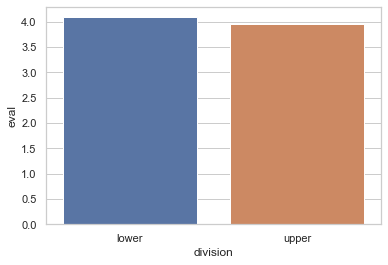

In [22]:
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)

The instructors teaching lower-division courses receive higher average teaching evaluations, but the difference can be ignored.

> Plot the relationship between age and teaching evaluation scores.

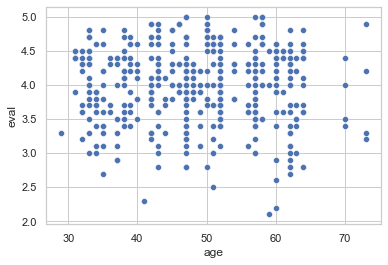

In [24]:
ax = sns.scatterplot(x="age", y="eval", data=ratings_df)

> Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

> Create a scatterplot with the scatterplot function in the seaborn library this time add the `hue` argument

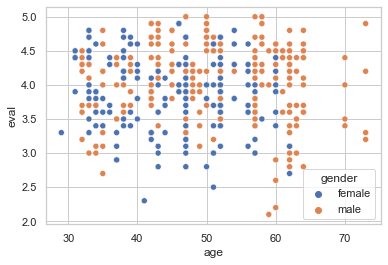

In [25]:
ax = sns.scatterplot(x="age", y="eval", data=ratings_df,
                    hue="gender")

> Create a box plot for beauty scores differentiated by credits.

`credits` : Is the course a single-credit elective?

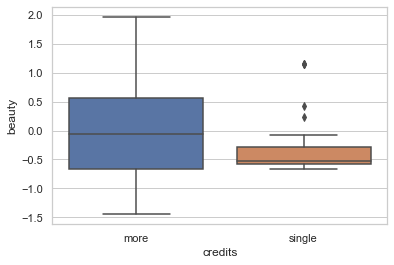

In [26]:
ax = sns.boxplot(x="credits", y="beauty", data=ratings_df)

> What is the number of courses taught by gender?

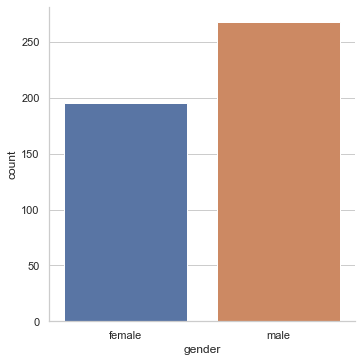

In [27]:
sns.catplot(x="gender", kind="count", data=ratings_df)

> Create a group histogram of taught by gender and tenure

<AxesSubplot:xlabel='gender', ylabel='Count'>

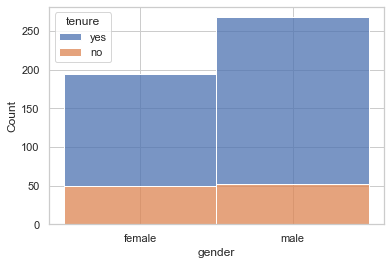

In [31]:
sns.histplot(x="gender", hue='tenure', data=ratings_df, multiple="stack")

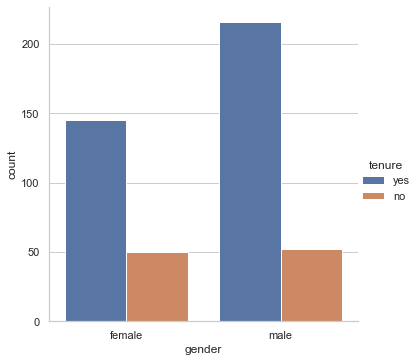

In [32]:
sns.catplot(x="gender", hue="tenure", kind="count", data=ratings_df)

<AxesSubplot:xlabel='gender', ylabel='Count'>

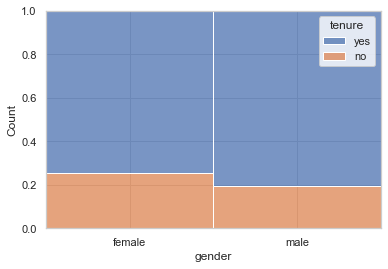

In [33]:
sns.histplot(x="gender", hue='tenure', data=ratings_df, multiple="fill")

<AxesSubplot:xlabel='gender', ylabel='Count'>

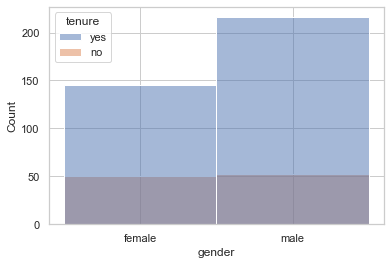

In [34]:
sns.histplot(x="gender", hue='tenure', data=ratings_df, multiple="layer") # default

<AxesSubplot:xlabel='gender', ylabel='Count'>

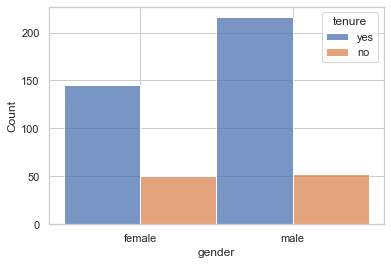

In [35]:
sns.histplot(x="gender", hue="tenure", data=ratings_df, multiple="dodge")

same as catplot

> Add division as another factor to the above histogram

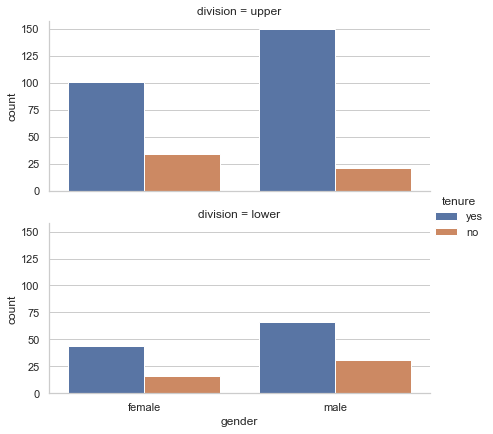

In [36]:
sns.catplot(x="gender", hue="tenure", row="division",
           kind="count", data=ratings_df,
           height=3, aspect=2)

> Create a scatterplot of age and evaluation scores, differentiated by gender and tenure

> Use the `relplot()` function for complex scatter plots

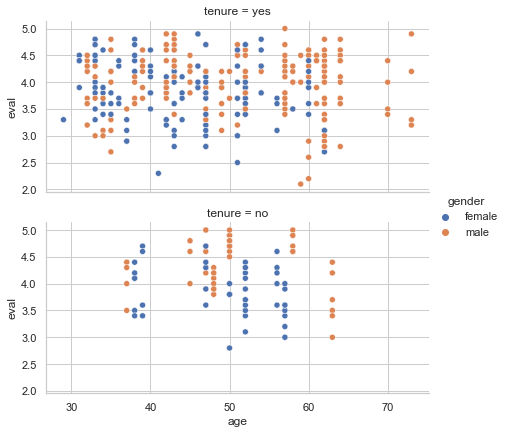

In [39]:
sns.relplot(x="age", y="eval",hue="gender", row="tenure",
           data=ratings_df, height=3, aspect=2)

> Create a distribution plot of teaching evaluation scores

> We use the `distplot()` function from the seaborn library, set kde = false because we don'e need the curve

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


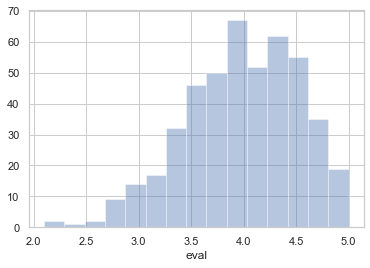

In [40]:
ax = sns.distplot(ratings_df['eval'], kde=False)

> `Create a distribution plot of teaching evaluation score with gender as a factor

In [41]:
mask_female = ratings_df["gender"] == "female"
mask_male = ratings_df["gender"] == "male"

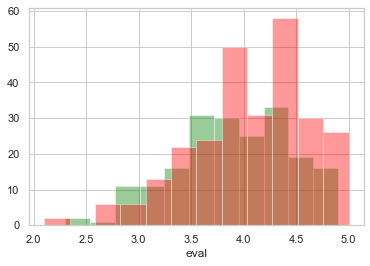

In [42]:
sns.distplot(ratings_df[mask_female]['eval'], color='green', kde=False)
sns.distplot(ratings_df[mask_male]['eval'], color='red', kde=False)
plt.show()

> Create a box plot - age of the instructor by gender

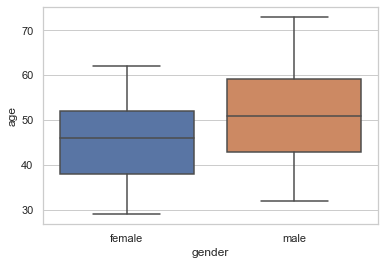

In [43]:
ax = sns.boxplot(x="gender", y="age", data=ratings_df)

> Compare age along with tenure and gender

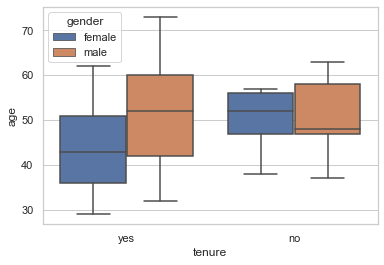

In [44]:
ax = sns.boxplot(x="tenure", y="age", hue="gender", data=ratings_df)

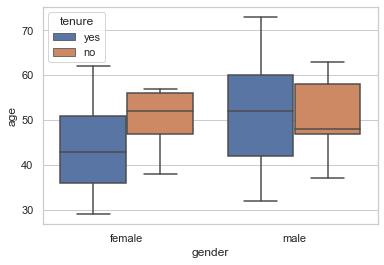

In [45]:
ax = sns.boxplot(x="gender", y="age", hue="tenure", data=ratings_df)

## Practice Questions

> Question 1: Create a distribution plot of beauty scores with Native English speaker as a factor

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


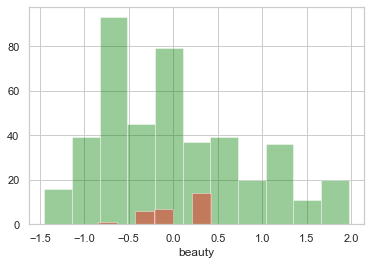

In [47]:
mask_native = ratings_df['native'] == "yes"
mask_nonnative = ratings_df['native'] == "no"

sns.distplot(ratings_df[mask_native]["beauty"], color="green", kde=False)
sns.distplot(ratings_df[mask_nonnative]["beauty"], color="red", kde=False)
plt.show()

> Question 2: Create a Horizontal box plot of the age of the instructors by visible minority

<AxesSubplot:xlabel='age', ylabel='minority'>

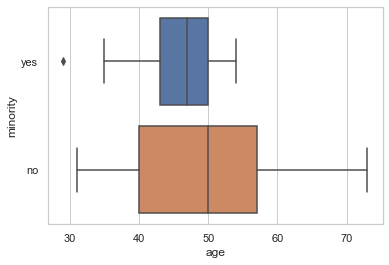

In [50]:
sns.boxplot(y="minority", x="age", data=ratings_df)

> Question 3: Create a group histogram of tenure by minority and add the gender factor

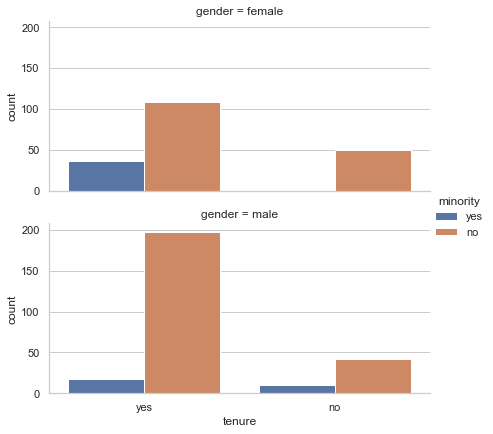

In [52]:
sns.catplot(x="tenure", hue="minority", row="gender",
           kind="count", data=ratings_df,
           height=3, aspect=2)

> Question 4: Create a boxplot of the age variable

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

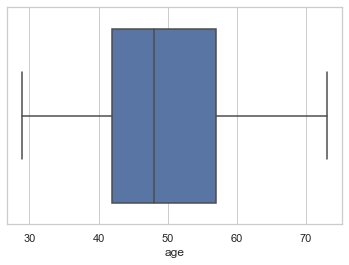

In [60]:
sns.boxplot(ratings_df["age"])

<AxesSubplot:ylabel='age'>

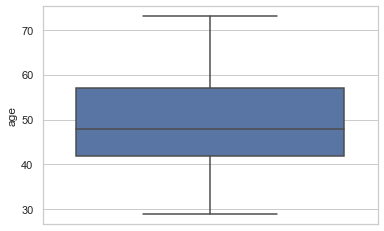

In [61]:
sns.boxplot(y='age', data=ratings_df)

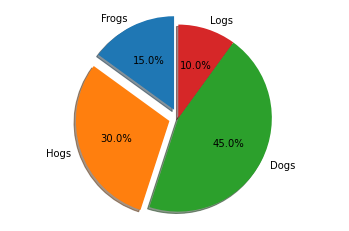

In [7]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0.1, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Claim

These exercises provided by [Course Statistics for Data Science with Python](https://www.coursera.org/learn/statistics-for-data-science-python/)